## Exploratory analysis of 2017 Nice ride trip history

In [1]:
# importing dependencies
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import datetime

In [2]:
#loading 2017 NiceRide ride trip history
nr = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/2017/Nice_ride_trip_history_2017_season.csv")

/home/grimoire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
station = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/2017/Nice_Ride_2017_Station_Locations.csv")

In [4]:
# Verifying data loaded in properly
nr.head(5)

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
0,11/5/2017 21:45,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048
1,11/5/2017 21:45,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513
2,11/5/2017 21:43,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817
3,11/5/2017 21:41,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
4,11/5/2017 21:38,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370


In [5]:
station.head(5)

,Number,Name,Latitude,Longitude,Total docks
0,30000,100 Main Street SE,44.984892,-93.256551,27
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,30004,11th Street & Hennepin,44.975340,-93.278690,23


In [6]:
# Max, Mean, median, and interquartile range for Total duration (Seconds) Column
print(nr['Total duration (Seconds)'].max())
print(nr['Total duration (Seconds)'].mean())
print(nr['Total duration (Seconds)'].median())
print(nr['Total duration (Seconds)'].quantile([.25,.75]))

11354802
2276.506628783768
764.0
0.25     408.0
0.75    1483.0
Name: Total duration (Seconds), dtype: float64


In [7]:
tot_ride_len = sum(nr['Total duration (Seconds)'])
print("Total use time in 2017: " +str(datetime.timedelta(seconds=tot_ride_len)))
print("That's " + "{0:.2f}".format(12139 / 365) + " years and some change")

Total use time in 2017: 12139 days, 4:59:41
That's 33.26 years and some change


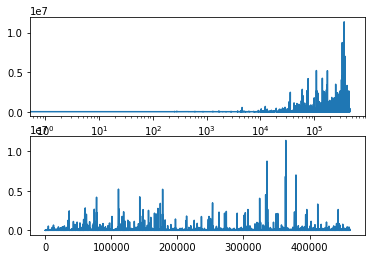

In [8]:
# Shows Total Duration (Seconds) plot
plt.subplot(2,1,1)
nr['Total duration (Seconds)'].plot(logx=True)
plt.subplot(2,1,2)
nr['Total duration (Seconds)'].plot()
plt.show()

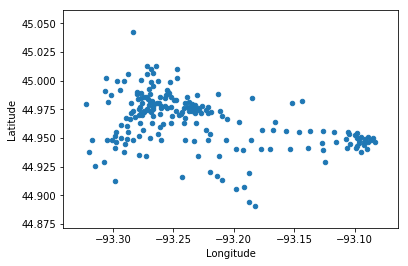

In [9]:
# Stations based on coordinates
station.plot(x='Longitude', y='Latitude', kind='scatter')
plt.show()

In [10]:
nr['Account type'].value_counts()

Member     290070
Casual     170646
Inconnu         2
Name: Account type, dtype: int64

In [11]:
# Creating new Dataframe based on account types
member = nr.loc[nr['Account type'] == 'Member',:]
casual = nr.loc[nr['Account type'] == 'Casual',:]
inconnu = nr.loc[nr['Account type'] == 'Inconnu',:]
# Remember that loc allows for calls by label

In [12]:
# inconnu is french for unknown
inconnu

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
168157,8/8/2017 10:51,N 4th Ave & W River Parkway,30144,8/8/2017 10:57,N 4th Ave & W River Parkway,30144,Inconnu,358
334673,6/10/2017 18:30,7th Place & Jackson Street,30118,6/10/2017 19:28,7th Place & Jackson Street,30118,Inconnu,3495


In [13]:
del member['Account type'], casual['Account type']

In [14]:
#Looking at differences between member and casual median with reference to nr.Dataframe
print("The median ride for:")
print("All users is " + "{0:.2f}".format(nr['Total duration (Seconds)'].median()/60) + " min(s)")
print("Members is " + "{0:.2f}".format(member['Total duration (Seconds)'].median()/60) + " min(s)")
print("Casual users is " + "{0:.2f}".format(casual['Total duration (Seconds)'].median()/60) + " min(s)")

The median ride for:
All users is 12.73 min(s)
Members is 8.93 min(s)
Casual users is 22.78 min(s)


In [15]:
#Looking at differences between member and casual mean with reference to nr.Dataframe
print("The mean ride for:")
print("All users is " + "{0:.2f}".format(nr['Total duration (Seconds)'].mean()/60) + " min(s)")
print("Members is " + "{0:.2f}".format(member['Total duration (Seconds)'].mean()/60) + " min(s)")
print("Casual users is " + "{0:.2f}".format(casual['Total duration (Seconds)'].mean()/60) + " min(s)")

The mean ride for:
All users is 37.94 min(s)
Members is 15.19 min(s)
Casual users is 76.62 min(s)


In [16]:
# Calculating stand. Dev.
print(nr['Total duration (Seconds)'].std())
print(member['Total duration (Seconds)'].std())
print(casual['Total duration (Seconds)'].std())

43932.44414646382
7646.957783242627
71434.80821605049


_look into adjusting for loop to use pandas column filtering/counting instead of for_
 * 1st code snippet involves using value_counts()
 * 2nd code snippet shows for looping and Counter() to tall

In [17]:
# 'Start station' & 'End station'
stat_from = nr['Start station'].value_counts()
stat_to = nr['End station'].value_counts()
print(stat_from.head(5))
print(stat_to.head(5))

Lake Street & Knox Ave S               10747
Washington Ave SE & Union Street SE    10278
Coffman Union                           9544
Weisman Art Museum                      9221
6th Ave SE & University Ave             8502
Name: Start station, dtype: int64
Lake Street & Knox Ave S               11658
Washington Ave SE & Union Street SE    10117
Weisman Art Museum                      8618
11th Ave S & S 2nd Street               8598
6th Ave SE & University Ave             8597
Name: End station, dtype: int64


In [18]:
# Which stations saw the most use from and to
stations_from = Counter()
stations_to = Counter()
for row in nr.values :
    stations_from[row[1]] += 1
    stations_to[row[4]] += 1

In [19]:
stations_from.most_common(5)
# Most common stations to leave from

[('Lake Street & Knox Ave S', 10747),
 ('Washington Ave SE & Union Street SE', 10278),
 ('Coffman Union', 9544),
 ('Weisman Art Museum', 9221),
 ('6th Ave SE & University Ave', 8502)]

In [20]:
stations_to.most_common(5)
# Most common stations to return to

[('Lake Street & Knox Ave S', 11658),
 ('Washington Ave SE & Union Street SE', 10117),
 ('Weisman Art Museum', 8618),
 ('11th Ave S & S 2nd Street', 8598),
 ('6th Ave SE & University Ave', 8597)]

In [21]:
members_from = Counter()
members_to = Counter()
for row in member.values :
    members_from[row[1]] += 1
    members_to[row[4]] += 1
# Most members are going from and to University campus

In [22]:
members_from.most_common(5)

[('Washington Ave SE & Union Street SE', 9295),
 ('Coffman Union', 8002),
 ('Weisman Art Museum', 7655),
 ('Willey Hall', 6699),
 ('Hennepin County Government Center', 6262)]

In [23]:
members_to.most_common(5)

[('Washington Ave SE & Union Street SE', 9201),
 ('Coffman Union', 7319),
 ('Weisman Art Museum', 7195),
 ('McNamara Center', 6559),
 ('Social Sciences', 6353)]

In [24]:
casual_from = Counter()
casual_to = Counter()
for row in casual.values :
    casual_from[row[1]] += 1
    casual_to[row[4]] += 1
# most casual use is around tourist destinations/lakes

In [25]:
casual_from.most_common(5)

[('Lake Street & Knox Ave S', 8514),
 ('100 Main Street SE', 5422),
 ('Lake Calhoun Center', 5189),
 ('11th Ave S & S 2nd Street', 4199),
 ('Lake Harriet Bandshell', 3883)]

In [26]:
casual_to.most_common(5)

[('Lake Street & Knox Ave S', 9059),
 ('100 Main Street SE', 5272),
 ('Lake Calhoun Center', 5162),
 ('11th Ave S & S 2nd Street', 4408),
 ('Lake Harriet Bandshell', 3977)]